# Partial Regression

만약 회귀 분석할 때 새로운 독립 변수를 추가해서 다시 회귀 분석을 한다면 그 전에 기존의 회귀 분석으로 구했던 가중치 벡터의 값을 달라질까 달라지지 않을까?

$x_1$이라는 독립 변수만으로 회귀 분석한 결과가 다음과 같다고 하자.

$$ y = w_1 x_1 + e $$

이 때 새로운 독립 변수 $x_2$를 추가하여 회귀 분석을 하게 되면 이 때 나오는 $w'_1$가 원래의 $w_1$과 같을까 다를까?

$$ y = w_1' x_1 + w_2' x_2 + e' $$

독립 변수 $x_1$만으로 이루어진 특징 행렬을 $X_1$, 독립 변수 $x_2$만으로 이루어진 특징 행렬을 $X_2$라고 하자.

만약 독립 변수 $x_1$만으로 회귀 분석을 하면 가중치 벡터는 다음과 같다.

$$ w_1 = (X_1^TX_1)^{-1}X_1^T y $$

그런데 독립 변수 $x_1$와 독립 변수 $x_2$를 같이 사용하면,

$$
\begin{bmatrix}
X_1 & X_2
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\hat{y} = y - e'
$$

$$
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
\begin{bmatrix}
X_1 & X_2
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
y
-
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
e'
=
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
y
$$

$$
\begin{bmatrix}
X_1^TX_1 & X_1^TX_2 \\
X_2^TX_1 & X_2^TX_2 \\
\end{bmatrix}
\begin{bmatrix}
w'_1 \\ w'_2
\end{bmatrix}
=
\begin{bmatrix}
X_1^T \\ X_2^T
\end{bmatrix}
y
$$

이 식을 풀면 다음과 같은 식을 얻을 수 있다.

$$
w'_1 = (X_1^TX_1)^{-1}X_1^T(y - X_2 w'_2) = (X_1^TX_1)^{-1}X_1^Ty - (X_1^TX_1)^{-1}X_1^T X_2 w'_2
$$

이 값은 독립 변수 $x_1$만으로 회귀 분석을 한 결과와 다르다.  따라서 **회귀 분석할 때 새로운 독립 변수를 추가해서 다시 회귀 분석을 한다면 그 전에 기존의 회귀 분석으로 구했던 가중치 벡터의 값은 달라진다.**

단 다음과 같은 경우에는 두 회귀 분석 결과가 같다.

1. $w'_2=0$. 즉 $X_2$와 $y$의 상관관계가 없는 경우
2. $X_1^T X_2 = 0$. 즉 독립 변수 $x_1$과 독립 변수 $x_2$의 상관관계가 없는 경우

# Frisch–Waugh–Lovell 정리

Frisch–Waugh–Lovell 정리 혹은 FWL 정리는 다음과 같다.

> 두 개의 독립 변수 $x_1$, $x_2$가 있을 때, $x_1$에 대한 가중치 벡터 $w_1$는 원래 다음 관계에서 구해야 한다.
>
> $$ y = X_1 w_1 + X_2 w_2 + e $$
>
> 하지만 다음 관계식에서 구한 가중치 벡터 $w_1$도 같은 값을 가진다.
> 
> $$ M_{x_2} y = M_{x_2} X_1 w_1  + e' $$

이 식에서 $M_{x_2}$는 $x_2$만을 독립 변수로 사용한 회귀 분석의 잔차 행렬(residual matrix)이다. 

$$ M_{x_2} = I - (X_2^TX_2)^{-1}X_2^T $$

$$ e' = M_{x_2}X_2 w_2  $$

따라서 위 식은 다음처럼 쓸 수 있다.

$$ y^{\ast} = X_1^{\ast} w_1 + e' $$

위 식에서 $y^{\ast}$는 $y$를 $x_2$로 회귀 분석하고 남은 잔차이고 $X_1^{\ast}$는 $X_1$를 $x_2$로 회귀 분석하고 남은 잔차이다.

따라서 FWL 정리는 다음과 같이 해석할 수 있다.

> **다른 독립 변수의 영향을 모두 제거한 후 남은 데이터만으로 회귀 분석을 한 결과는 모든 독립 변수를 같이 사용하여 회귀 분석한 결과와 같다.**

## Partial Regression Plot

독립변수의 갯수가 많을 경우에 특정한 하나의 독립변수의 영향력을 시각화하는 방법이 Partial Regression Plot이다. Partial Regression Plot은 Added Variable Plot이라고도 한다.

Partial Regression Plot을 그리기 위해서는 3번의 선형회귀를 해야한다.

1. 특정한 독립변수 Z를 제외한 나머지 독립변수 X들로 종속변수를 선형회귀하여 잔차 $y^{\ast}$를 구한다.
2. 나머지 독립변수 X들로 특정한 독립변수 선형회귀하여 잔차 $z^{\ast}$를 구한다.
3. 잔차 $z^{\ast}$를 독립변수로, 잔차 $y^{\ast}$를 종속변수로 하여 선형회귀한다.

이렇게 구한 $z^{\ast}$, $y^{\ast}$의 스캐터 플롯과 회귀 분석 결과를 나타낸 것이 Partial Regression Plot이다.

보스턴 데이터를 대상으로 Partial Regression Plot을 그리면 다음과 같다.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

하나의 변수에 대해 `plot_regress_exog` 명령을 실행하면 Partial Regression Plot을 포함한 분석 결과를 보여준다.

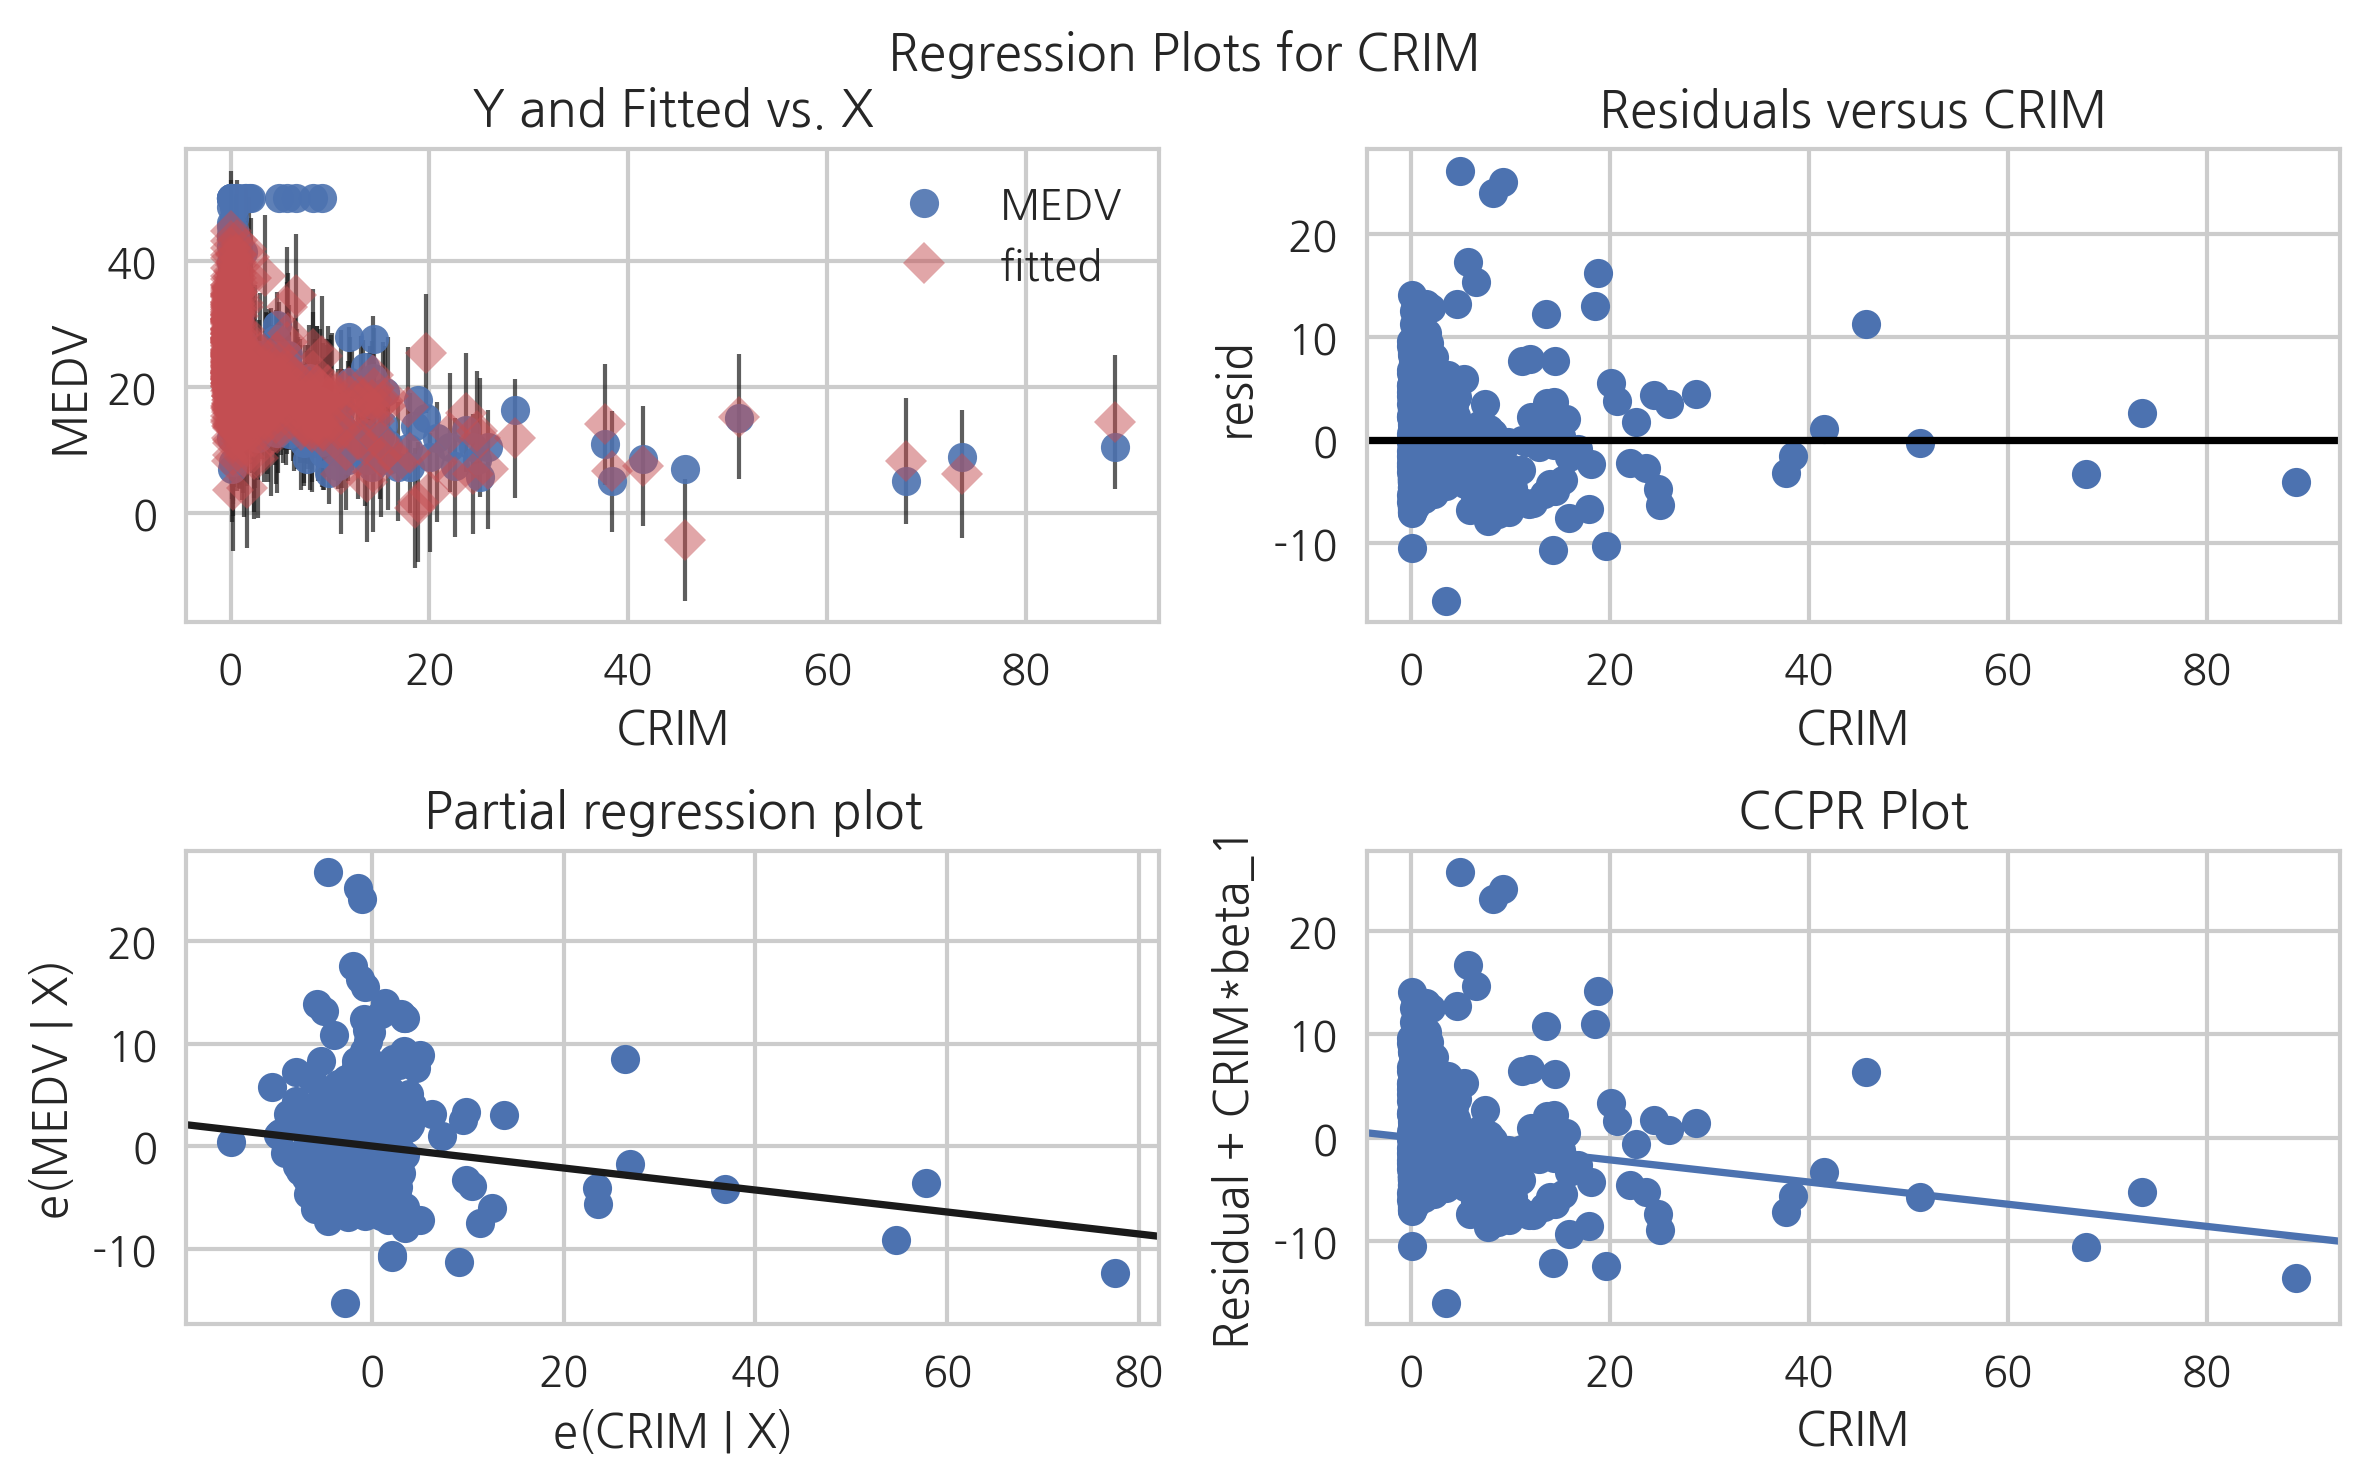

In [2]:
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
plt.show()

`sm.graphics.plot_partregress` 명령을 쓰면 partial regression plot만을 그릴 수 있다. 이 때 인수 `ret_coords=True`로 하면 잔차 데이터를 반환한다.

* http://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_partregress.html

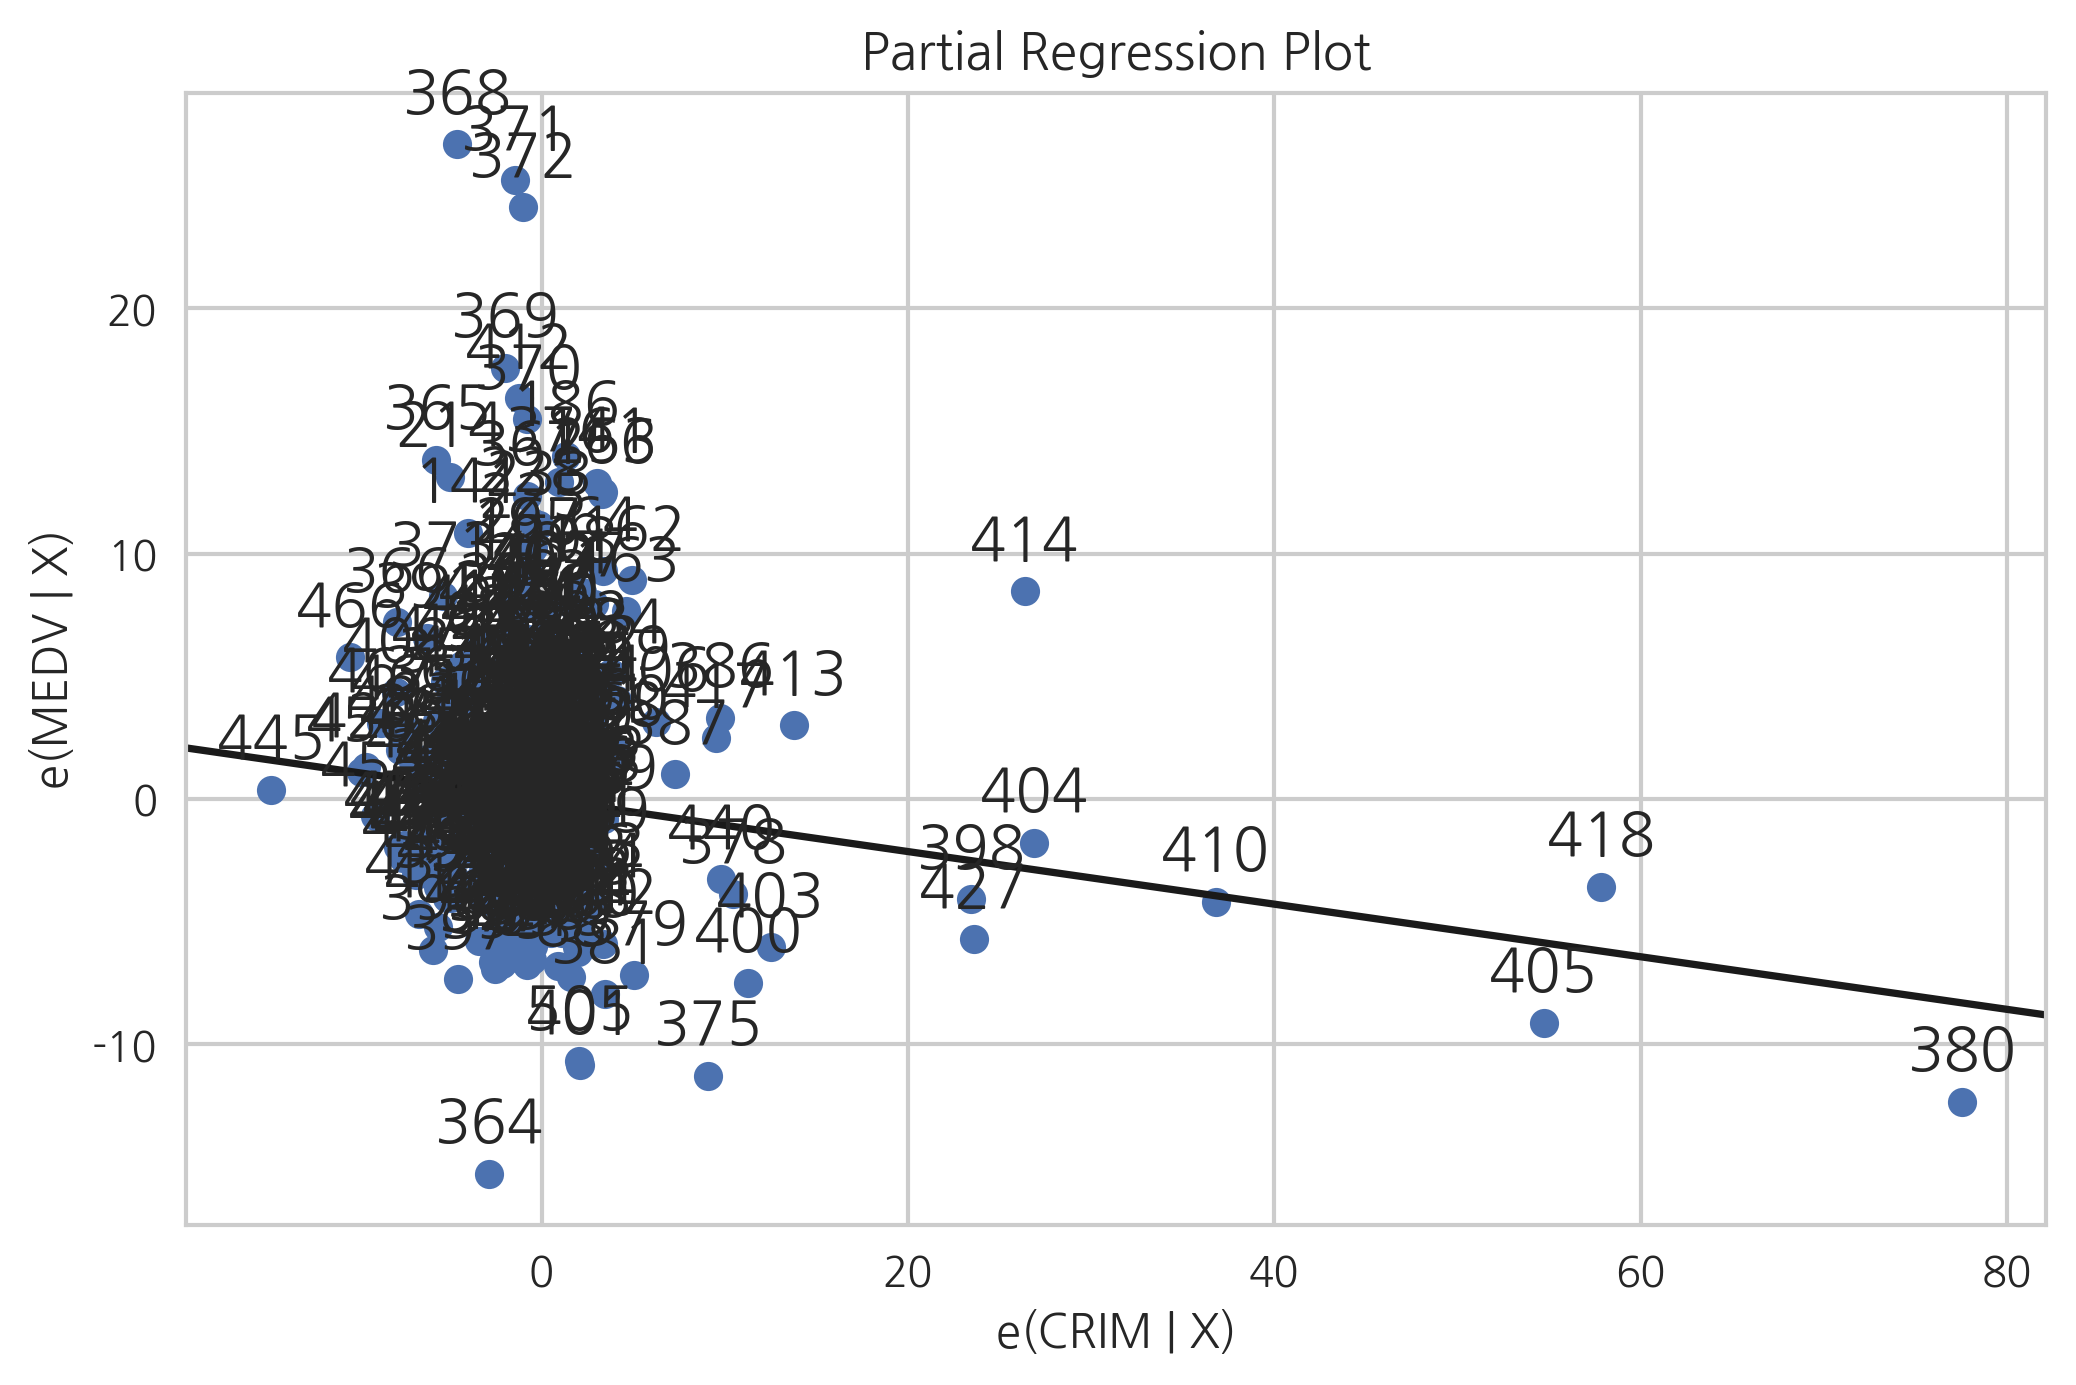

In [3]:
p, resids = sm.graphics.plot_partregress("MEDV", "CRIM", list(set(df.columns).difference(set(["MEDV", "CRIM"]))), 
                                         data=df, ret_coords=True)
plt.show()

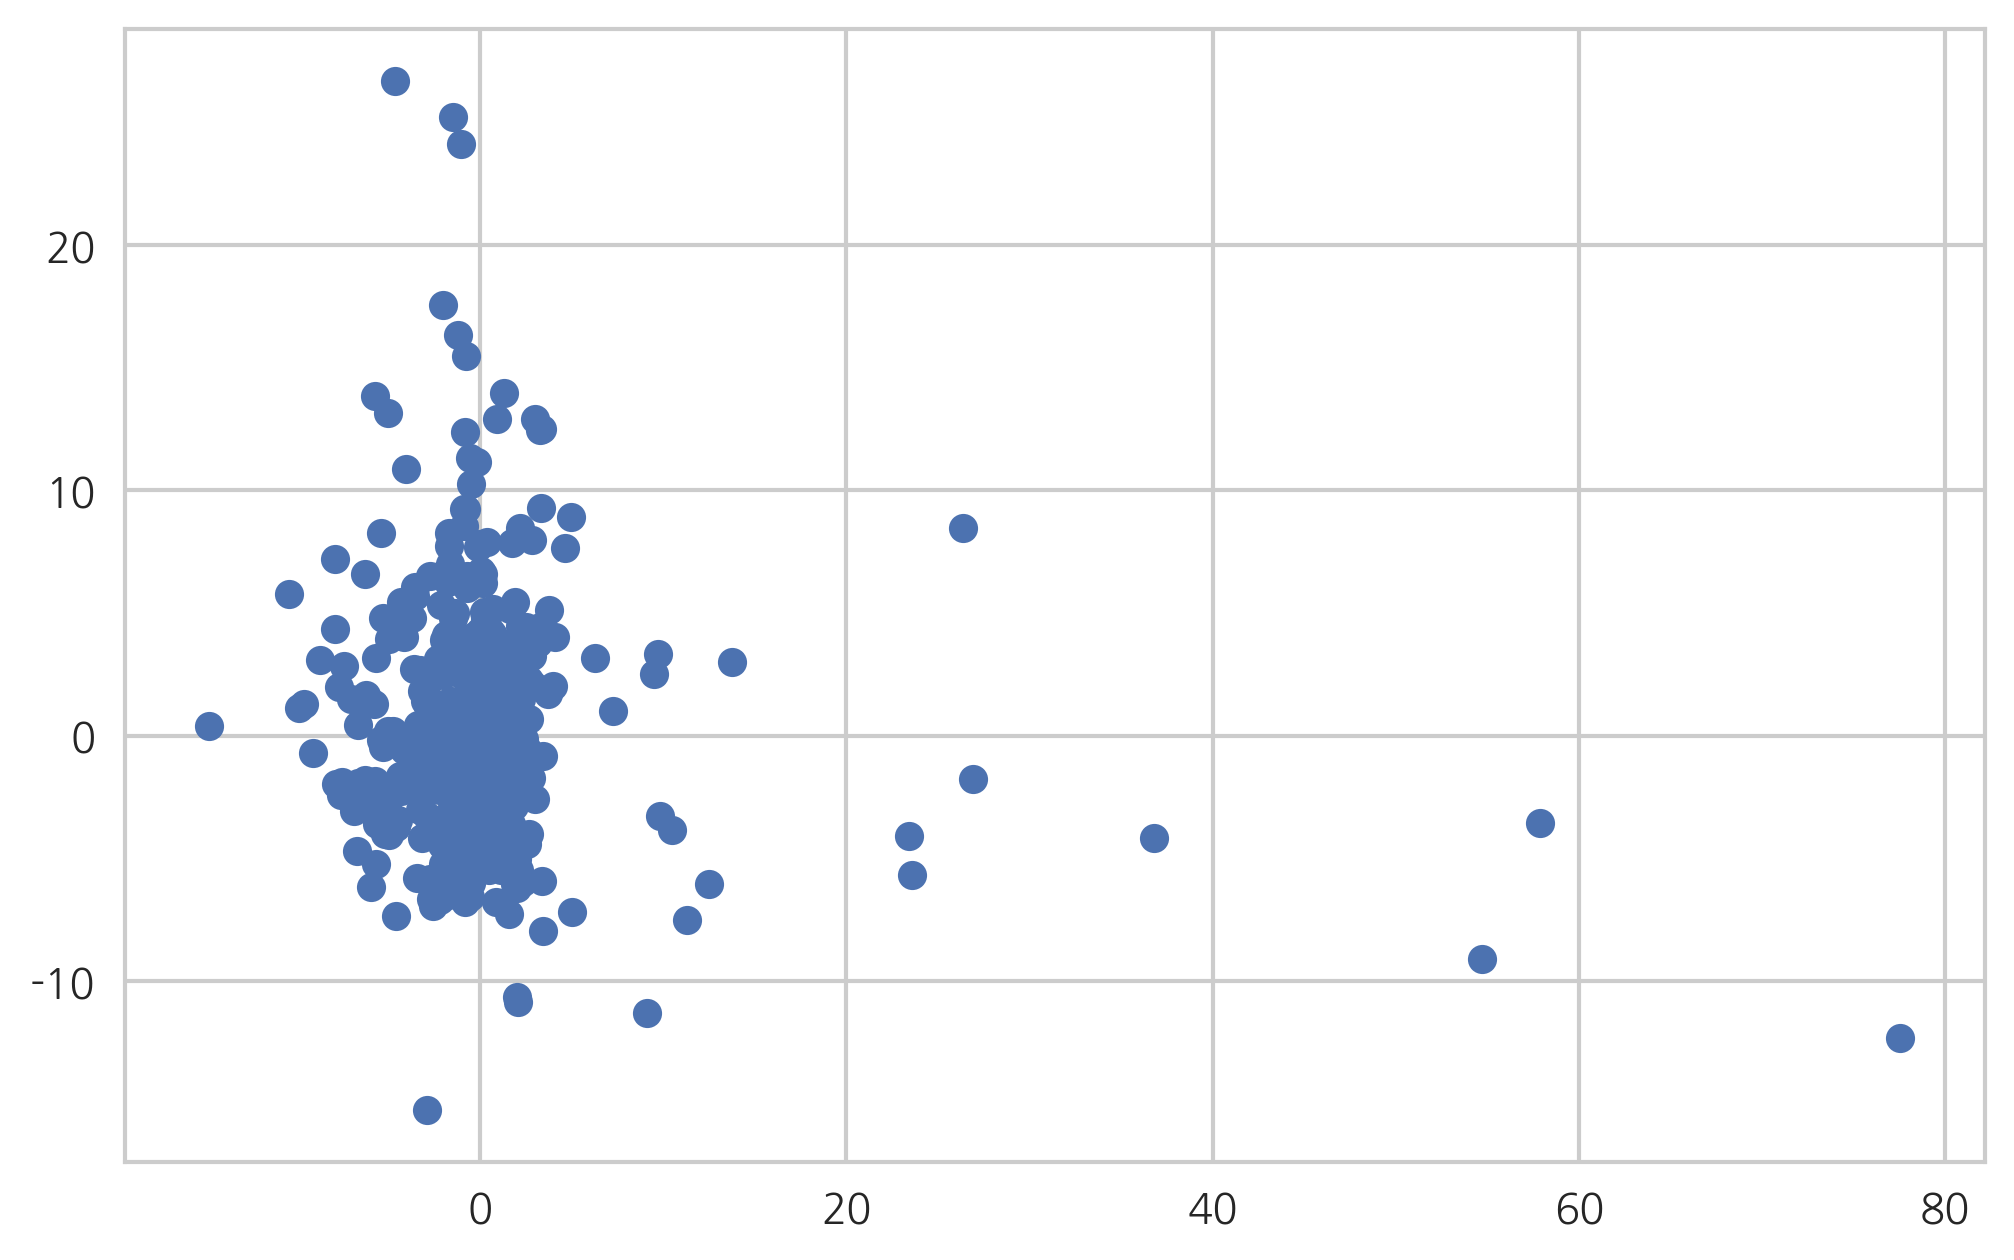

In [4]:
plt.plot(resids[0], resids[1], 'o')
plt.show()

`sm.graphics.plot_partregress_grid` 명령을 쓰면 전체 데이터에 대해 한번에 partial regression plot을 그릴 수 있다.

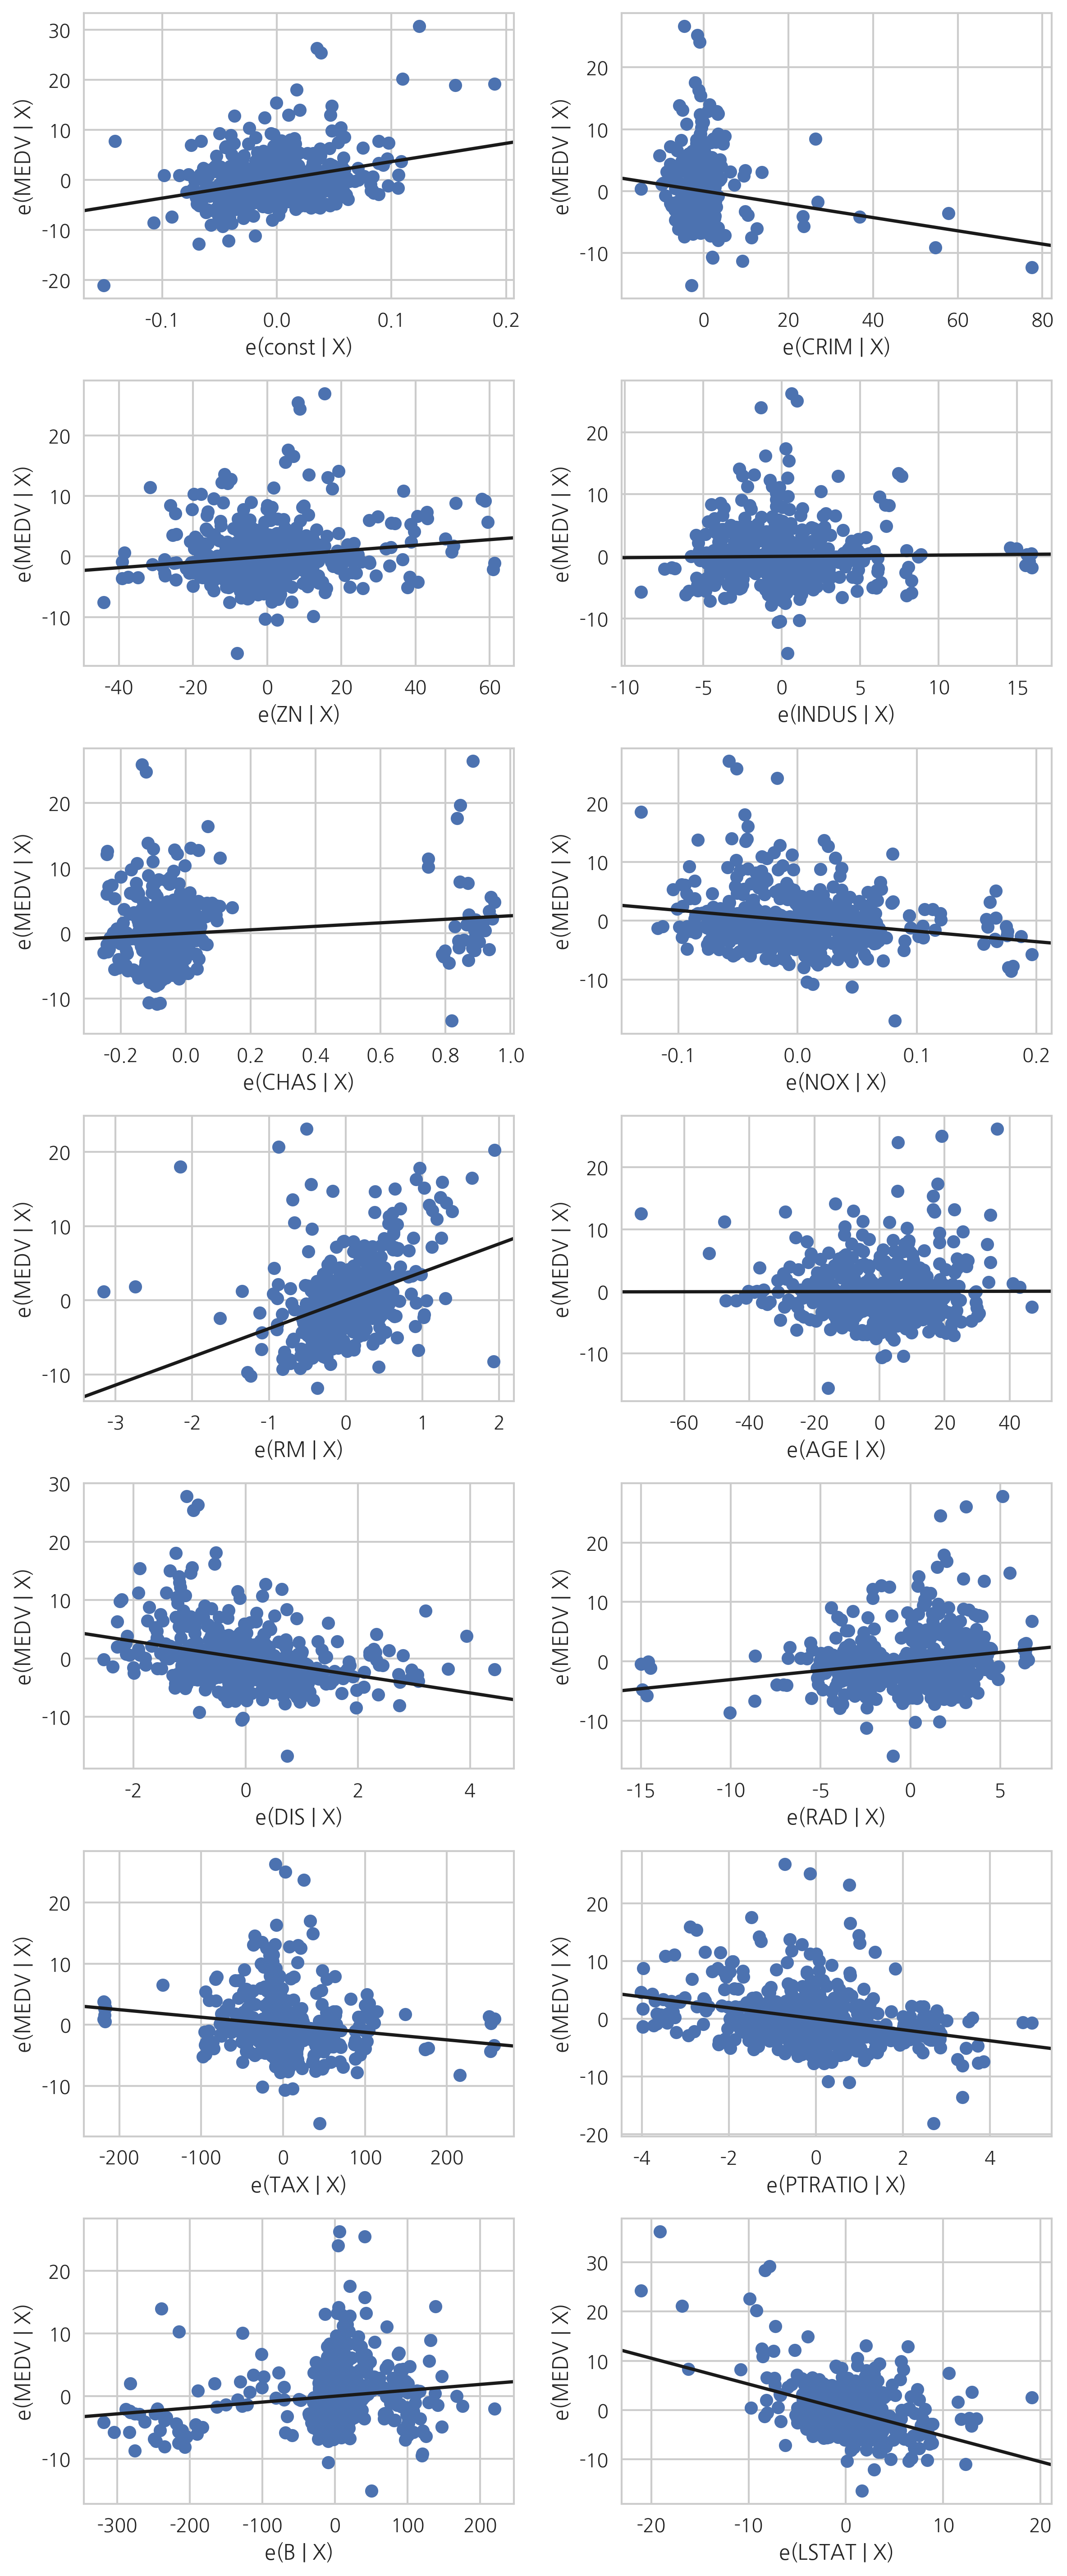

In [5]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

## CCPR 플롯

CCPR(Component-Component plus Residual) 플롯도 Partial Regression Plot과 마찬가지로 특정한 하나의 변수의 영향을 살펴보기 위한 것이다.

다음과 같은 회귀 모형이 있다고 가정하자.

$$ y = \hat{y} + e = w_1 x_1 +  w_2 x_2 +  \cdots + w_i x_i +  \cdots +  w_K x_K + e $$

CCPR 플롯은 이 성분 중에서 

$$ x_i \;\; \text{ vs } \;\; w_i x_i + e $$

를 스캐터 플롯으로 그린 것이다.

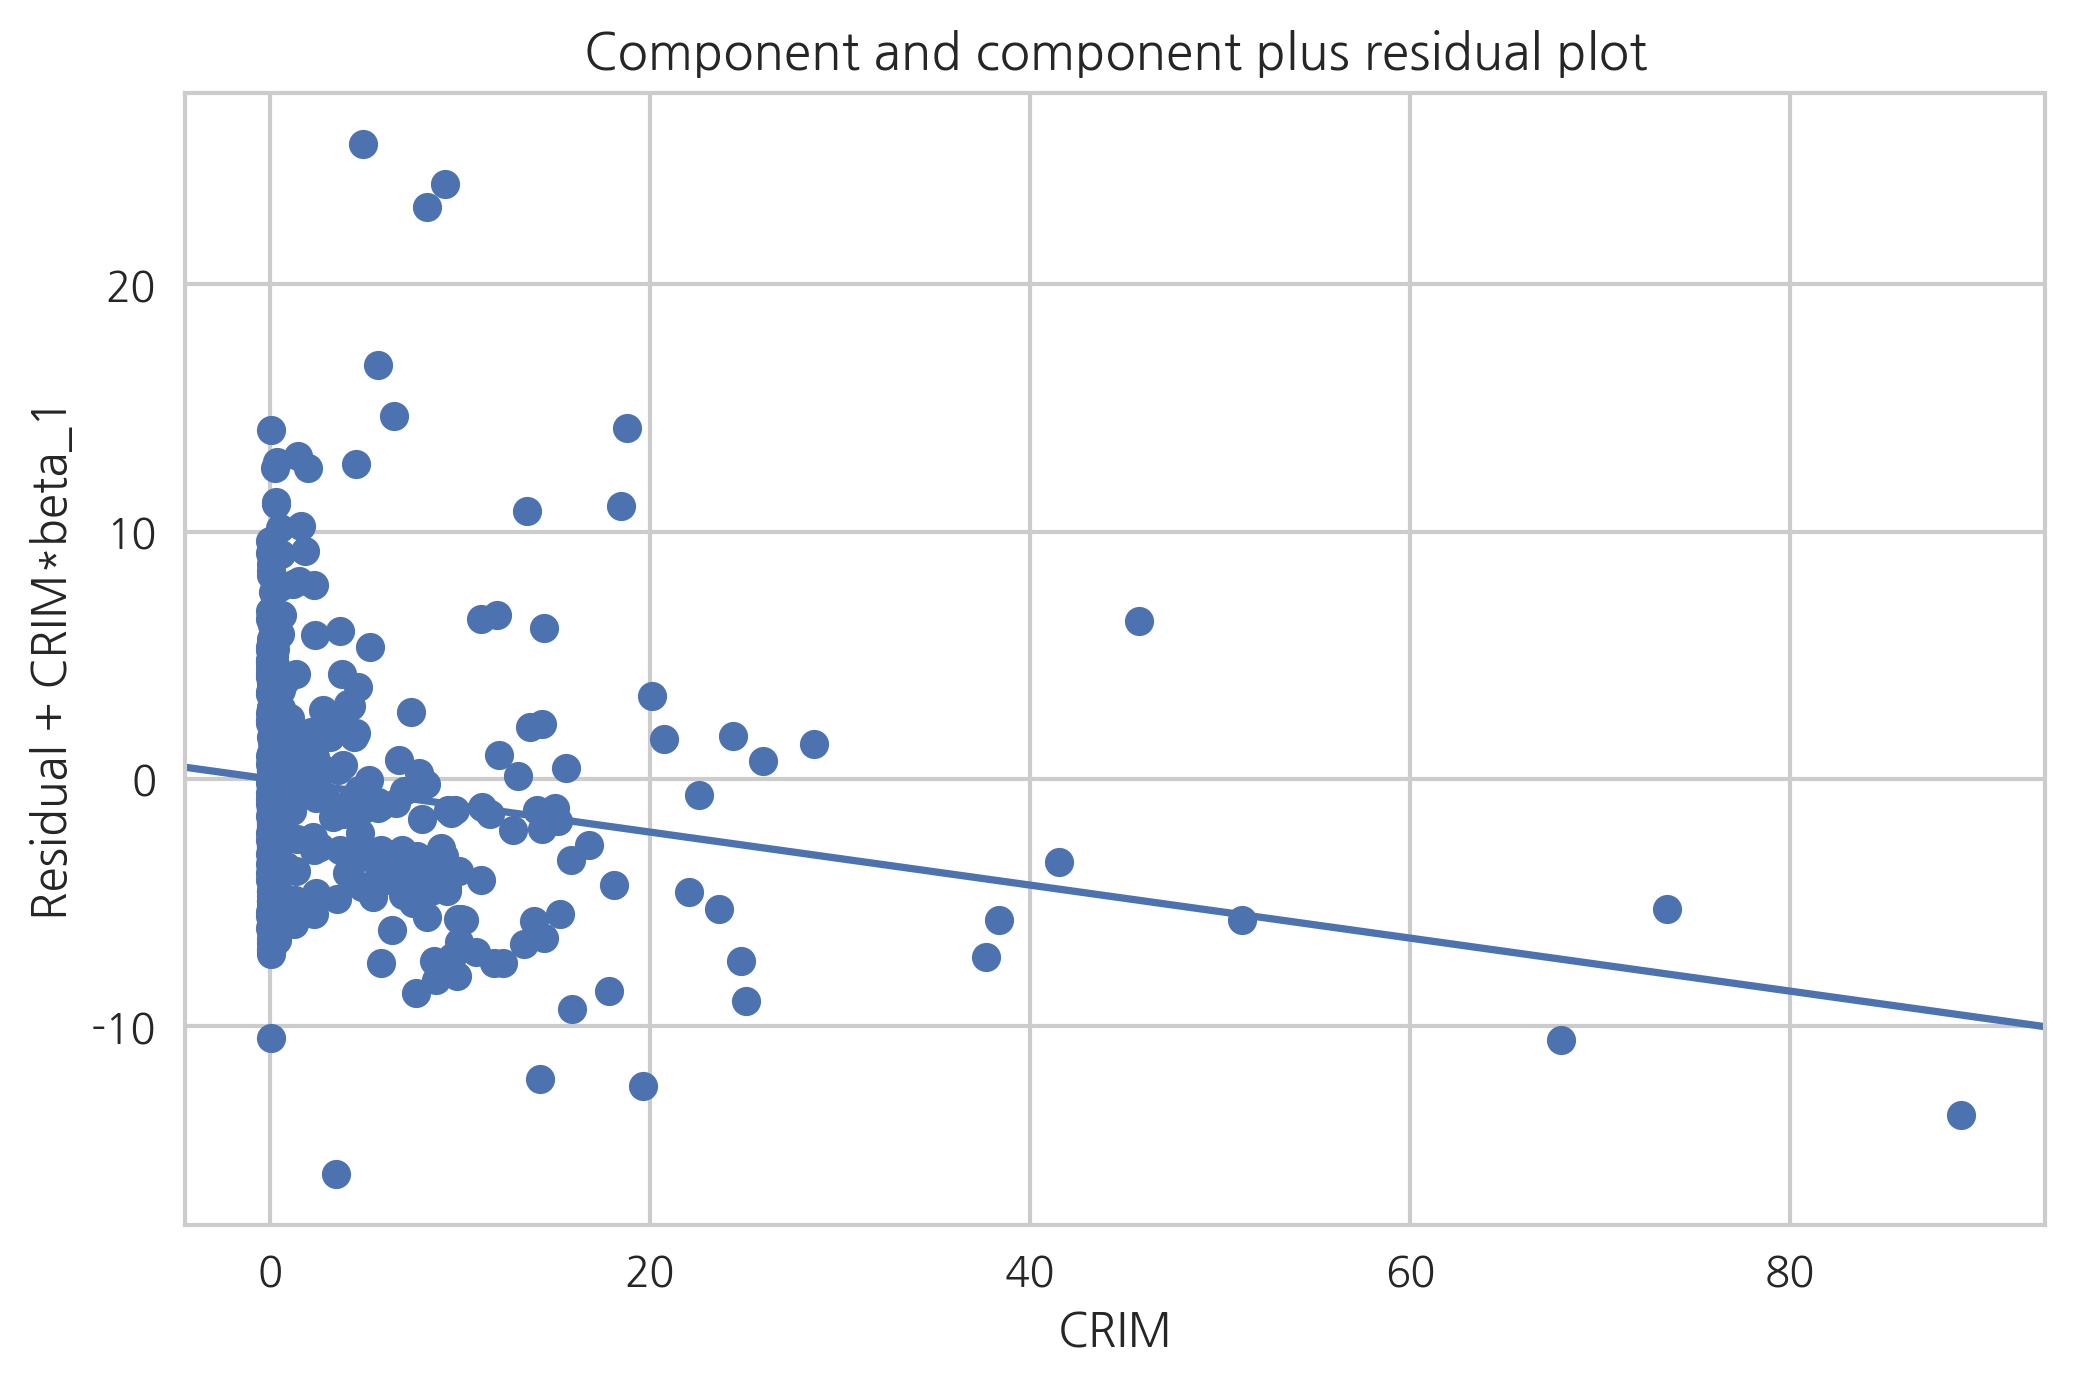

In [6]:
sm.graphics.plot_ccpr(result_boston, "CRIM")
plt.show()

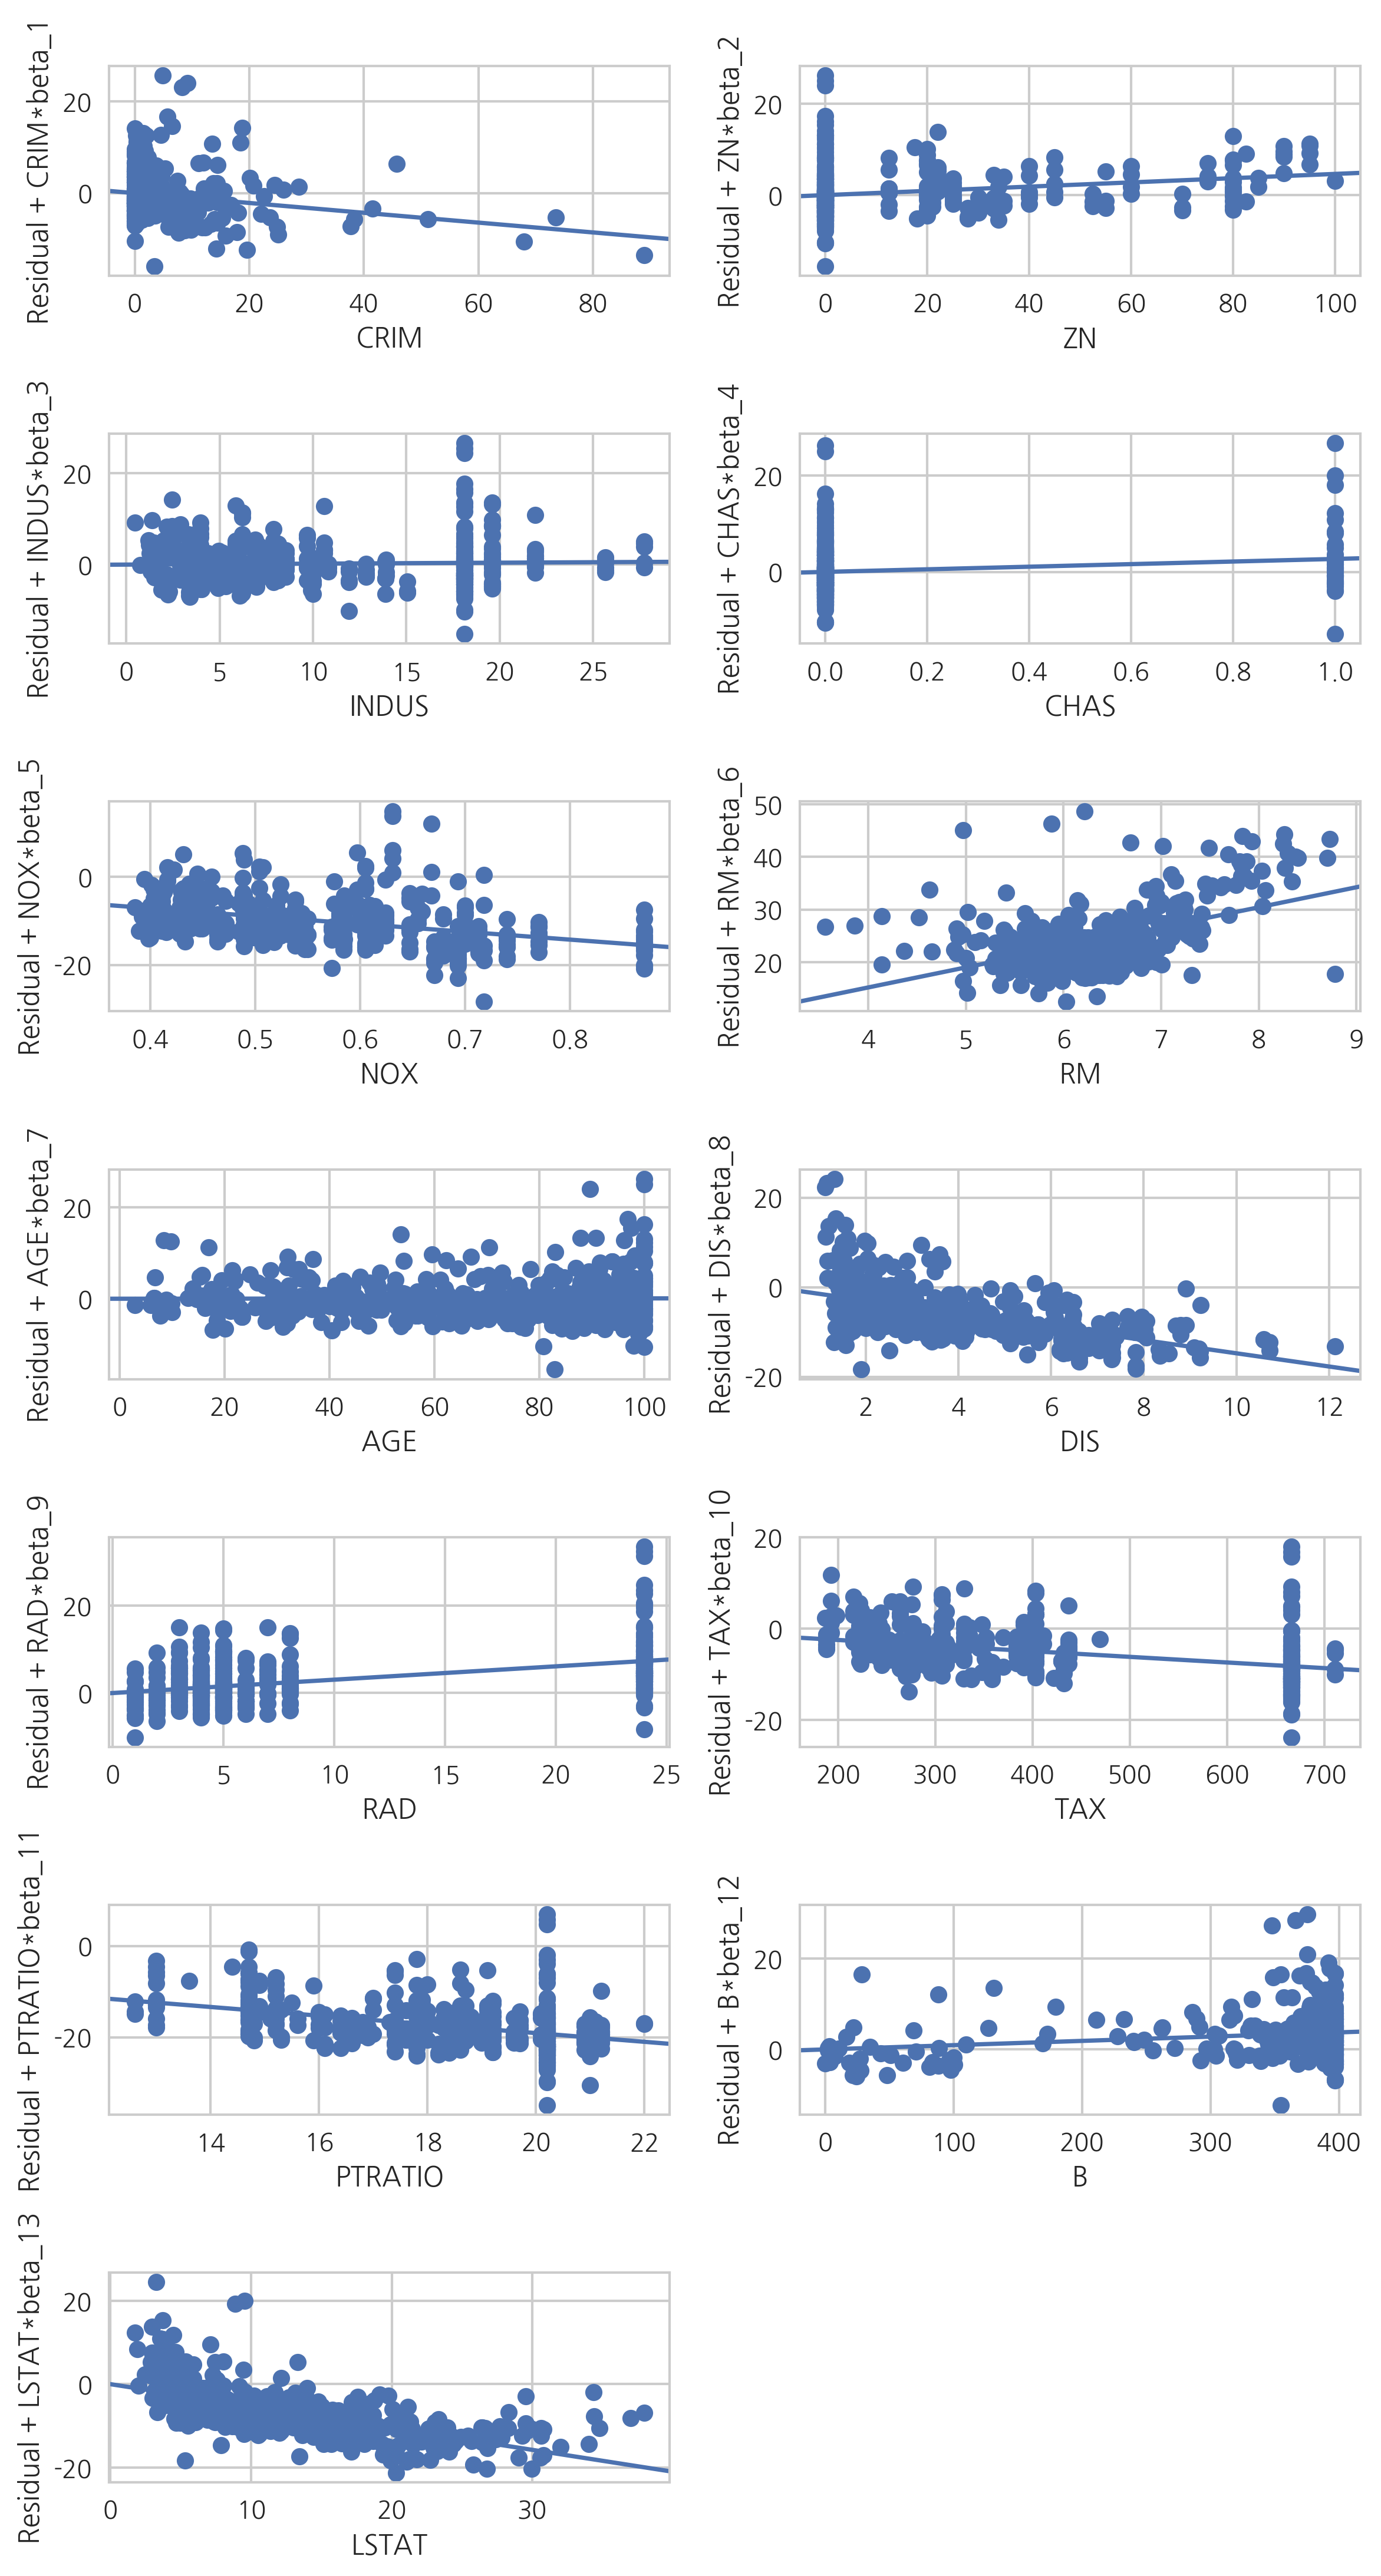

In [7]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle("")
plt.show()

CCPR 플롯에서는 Partial Regression Plot과 달리 독립변수가 원래의 값 그대로 나타난다.